# Trial Data for Linear Regression
This is for testing out the implemented function using another exemplar dataset from Coursera

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Color for matplotlib
from matplotlib import cm
import matplotlib as mpl
%matplotlib inline
#Using tex for matplotlib axis 
mpl.rcParams['text.usetex'] = True

In [2]:
df = pd.read_csv("./ex1data1.txt", names = ["Population of City in 10,000s", "Profit in \$10,000s"])
df.head()

,"Population of City in 10,000s","Profit in \$10,000s"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


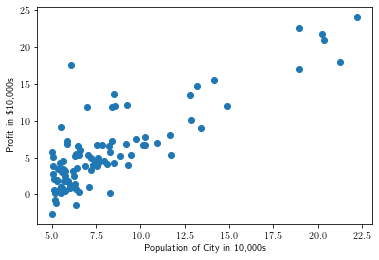

In [3]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [4]:
def hypothesis(x, theta):
    return (theta[0] + theta[1] * x)

def uni_mse(x, y, theta):
    squared_sum = 0
    m = y.size
    for i_th in range(x.size):
        squared_sum += np.square(hypothesis(x[i_th], theta) - y[i_th])
    return (1/ (2*m) * squared_sum)
    


In [5]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]
theta = [-1, 2]


In [ ]:
# Define the range of theta 0 and theta 1, where the cost will be visualized 
theta0_val = np.linspace(-10, 10, 100)
theta1_val = np.linspace(-1, 4, 100)

# Set up zero matrix, so that the combination of each theta 0 and theta 1 can generate the error
J_vals = np.zeros((theta0_val.size, theta1_val.size))
for i in range(theta0_val.size):
    for j in range(theta1_val.size):
        theta = [theta0_val[i], theta1_val[j]]
        J_vals[i, j] = uni_mse(x, y, theta)
J_vals = np.matrix.transpose(J_vals)

In [ ]:

X, Y = np.meshgrid(theta0_val, theta1_val)
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, J_vals,cmap = cm.Spectral)
ax.set_xlabel(r'$\theta_0$', fontsize=16)
ax.set_ylabel(r'$\theta_1$', fontsize=16)
ax.set_zlabel(r'$J(\theta)$', fontsize=16)

ax.invert_xaxis()

plt.show()

In [ ]:
X, Y = np.meshgrid(theta0_val, theta1_val)
fig,ax=plt.subplots(1,1, figsize=(12,8))
ax.contour(X, Y, (J_vals), np.logspace(-1, 3), cmap = cm.coolwarm)
ax.plot(-3.6303, 1.1664, "-o", label = "Global Minima")
ax.legend()
ax.set_xlabel(r'$\theta_0$', fontsize=16)
ax.set_ylabel(r'$\theta_1$', fontsize=16)
plt.show()